# 2. Data understanding

## 2.1 Employees table

In [85]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [225]:
address = 'C:/Users/Moanesga/Desktop/Data/employees.csv'
employees = pd.read_csv(address)

employees.columns = ['emp_no','birth_date','first_name','last_name','gender','hire_date']
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [226]:
gender = pd.DataFrame(employees, columns =['emp_no','gender','birth_date'])
#DataFrame.count(axis=0, level=None, numeric_only=False)
gender.set_index(["birth_date",'gender']).count(level="gender")

,emp_no
gender,
F,120051
M,179973


In [227]:
print(type(employees['hire_date']))

<class 'pandas.core.series.Series'>


In [228]:
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

In [245]:
employees.describe(include='all')

,emp_no,birth_date,first_name,last_name,gender,hire_date
count,300024.000000,300024,300024,300024,300024,300024
unique,NaN,4750,1275,1637,2,5434
top,NaN,1952-03-08,Shahab,Baba,M,1985-06-20 00:00:00
freq,NaN,95,295,226,179973,132
first,NaN,NaN,NaN,NaN,NaN,1985-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2000-01-28 00:00:00
mean,253321.763392,NaN,NaN,NaN,NaN,NaN
std,161828.235540,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN
25%,85006.750000,NaN,NaN,NaN,NaN,NaN


In [230]:
# Range of "hire_date"
from datetime import datetime
from dateutil import relativedelta

In [231]:
# Covering 15 years, 
a = datetime(1985,1,1)
b = datetime(2000,1,28)
delta = relativedelta.relativedelta(b,a)
years = delta.years
months = delta.months
days = delta.days
print("Range of variable hire_date is",years, "years",months, "months", days, "days")

Range of variable hire_date is 15 years 0 months 27 days


In [232]:
hire_date = pd.DataFrame(employees, columns =['hire_date','emp_no','gender'])
#DataFrame.count(axis=0, level=None, numeric_only=False)
hire_date_df = hire_date.set_index(["hire_date","gender"]).count(level="hire_date")
hire_date_df.head(5)

,emp_no
hire_date,
1985-01-01,9
1985-01-14,1
1985-02-01,15
1985-02-02,110
1985-02-03,107


In [233]:
rng = pd.date_range(start='1985-01-01',end='2000-01-30', freq='D')
rng

DatetimeIndex(['1985-01-01', '1985-01-02', '1985-01-03', '1985-01-04',
               '1985-01-05', '1985-01-06', '1985-01-07', '1985-01-08',
               '1985-01-09', '1985-01-10',
               ...
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30'],
              dtype='datetime64[ns]', length=5508, freq='D')

In [234]:
hire_date_df_1 = hire_date_df.reindex(rng, fill_value=0)
hire_date_df_1.head(5)

,emp_no
1985-01-01,9
1985-01-02,0
1985-01-03,0
1985-01-04,0
1985-01-05,0


In [235]:
#loading libraries
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import scipy 
from scipy import stats

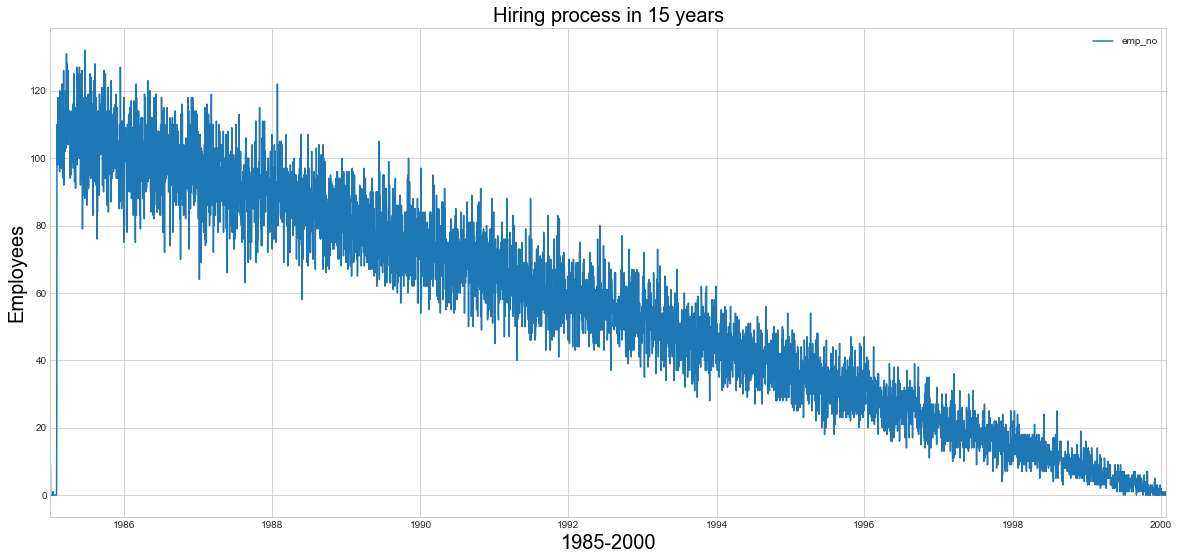

In [236]:
#Plot settings
%matplotlib inline
rcParams['figure.figsize'] = 20, 9
sb.set_style('whitegrid')

hire_date_df_1.plot()
plt.title('Hiring process in 15 years',fontsize=20, color='black')
plt.ylabel('Employees',fontsize=20, color='black')
plt.xlabel('1985-2000',fontsize=20, color='black')
plt.show()

In [237]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 1
sb.set_style('whitegrid')

In [238]:
#average of hiring per day first 5 years (1985 to 1990)
Average_hires_1985to1990 = pd.DataFrame(hire_date_df_1.loc['19850101':'19901231'])
Average_hires_1985to1990['emp_no'].mean()

86.90415335463258

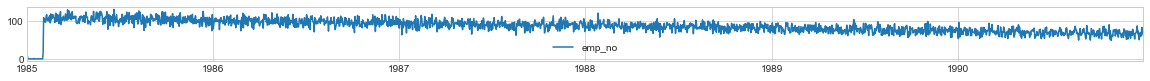

In [239]:
Average_hires_1985to1990.plot()

In [240]:
#average of hiring per day mid 5 years (1990 to 1995)
Average_hires_1990to1995 = pd.DataFrame(hire_date_df_1.loc['19900101':'19951231'])
Average_hires_1990to1995['emp_no'].mean()

51.712460063897765

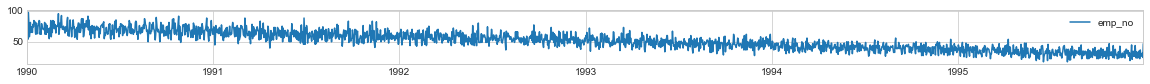

In [241]:
Average_hires_1990to1995.plot()

In [242]:
#average of hiring per day last 5 years (1995 to 2000)
Average_hires_1995to2000 = pd.DataFrame(hire_date_df_1.loc['19950101':'20000131'])
Average_hires_1995to2000['emp_no'].mean()

18.34051724137931

Conclusion: data shows a decreasing tendency in the number of hires in the last 15 years of the 20th century, it can be assumed that a company initiates recording human department information in january 1985, although first month only 10 employees where hired, oncoming months were marked for an accelerated hiring process reaching an average of 87 people hired per day (h/d) during the first five years, closing the decade of 1995 with 52 h/d and finishing the century with 18 h/d. It could be causes by high personnel retention because of development programs or headcount movements to more profitable business units. 